In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix

**Import the Data**

Now we load in a dataset from the [UCI Machine learning Respository](https://archive.ics.uci.edu/) .specially we are going to sue the [Heart disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease). This will allow us to predict if someone has heart disease based their sex,age,blood pressure and varitey of other metrics.

In [3]:
df = pd.read_csv("processed.cleveland.data",
                 header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


let's replace the colunm numbers with the following column namnes

**age**,

**sex**,

**cp**, chest pain 

**restbp**,resting blood pressure in (mm,Hg)

**chol**, serum cholestrol in mg/dl

**fbs**, fasting blood sugar

**restecg**, resting electrocardiographic results

**thalach**, maximum heart rate acheived

**exchang**,exercise induced angina

**oldpeak**,st depression induced by exercise relative to rest

**slope**, the slope ofthe peak exsercise st segment

**ca**, number of maximum vessels(0-3)coloured by flouroscopy

**thal**,this is the short of thalium heart scan

**hd**, diagonosis of heart disease,the predicted attribute

In [4]:
#chabge the coulmn number with column names
df.columns=[
       'age',
       'sex',
       'cp',
      'restbp',
       'chol',
       'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
         'ca',
         'thal',
         'hd']


df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**let's check what sort of data is in each column**

In [5]:
#dtype tell us the data type each columns has
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

we see that they are almost float64, however two column **ca**,**thal** have object typoe and column 
**hd** has int64

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
len(df.loc[(df['ca']=='?') 
    
    | (df['thal']=='?')])

6

In [9]:
df.loc[(df['ca']=='?') 

| (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
len(df)

303

In [11]:
df_no_missing = df.loc[(df['ca']!='?') 

& (df['thal']!='?')]

In [12]:
df_no_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [13]:
len(df_no_missing)

297

In [14]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [16]:
X = df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [17]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [18]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [19]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [20]:
pd.get_dummies(X,columns =['cp'],dtype = int ).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [21]:
categ_C = X.select_dtypes(include = ["object"]).columns

In [22]:
categ_C

Index(['ca', 'thal'], dtype='object')

In [23]:
X_encoded = pd.get_dummies(X,columns = [
                                       'cp',
                                       'restecg', 
                                       'slope',
                                       'thal'],
                                      dtype = int )
X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


In [24]:
y.unique()

array([0, 2, 1, 3, 4])

In [25]:
y_not_zero_index = y > 0
y[y_not_zero_index ] = 1
y.unique()

array([0, 1])

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

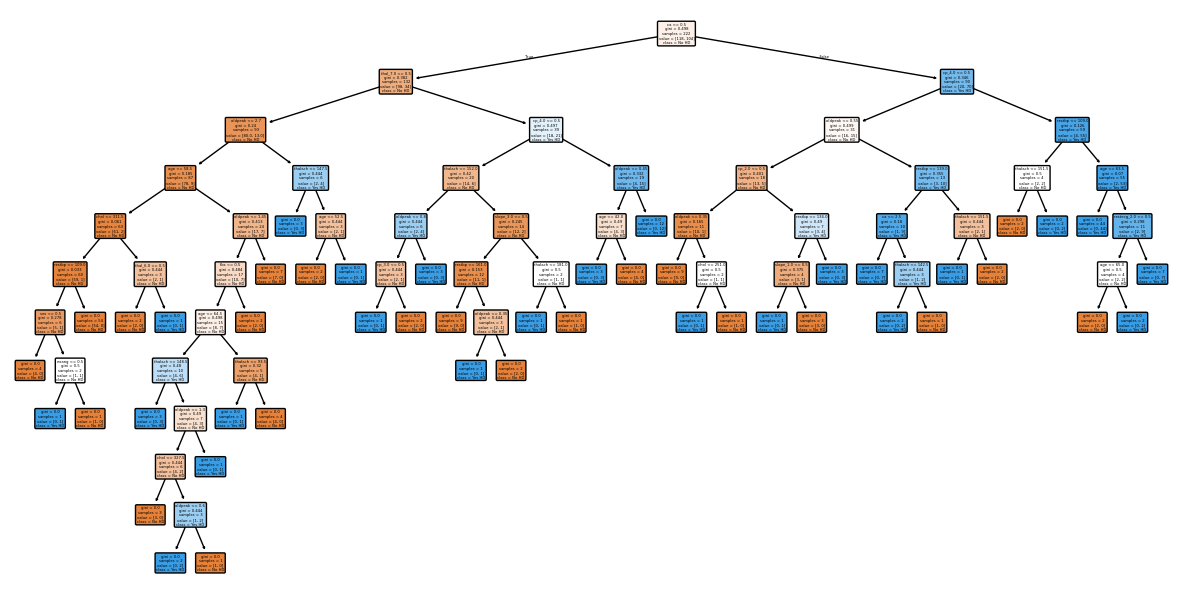

In [27]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled =True,
         rounded = True,
         class_names = ["No HD","Yes HD"],
         feature_names = X_encoded.columns);

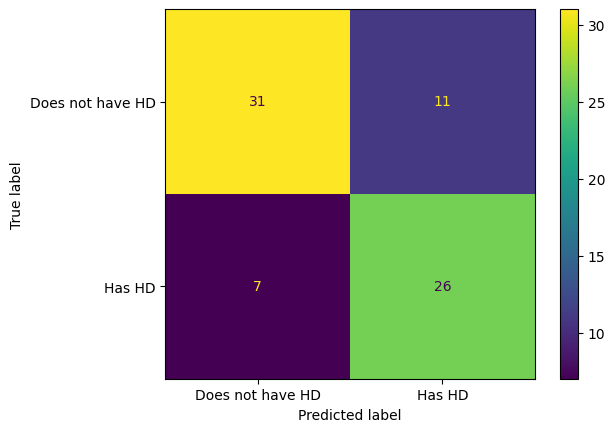

In [28]:

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    clf_dt,
    X_test,
    y_test,
    display_labels=["Does not have HD", "Has HD"]
)

**Cost complexity pruning : Visulizing Alpha**

In [29]:

path = clf_dt.cost_complexity_pruning_path(X_train,y_train)#Determinng values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alphas 
ccp_alphas = ccp_alphas[:-1] #excluding the maximum values for alpha 

clf_dts = [] #create an that we will put decision trees into 
#now create one decision trees per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state =0,ccp_alpha = ccp_alpha)
    clf_dt = clf_dt.fit(X_train, y_train)
    clf_dts.append( clf_dt)
    

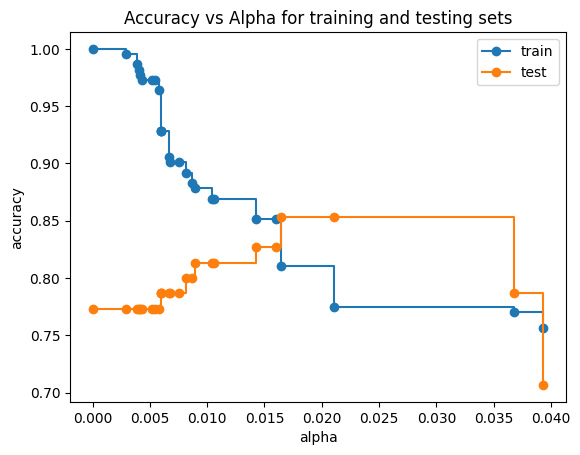

In [30]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig ,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores ,label = "train",marker='o',drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores ,label = "test",marker='o',drawstyle="steps-post")
ax.legend()
plt.show()

**Cost complexity pruning : Cross validation for finding the best alpha**

The graph we drew suggested one value for alpha ,0.016 but another set of data might sugesst
another optinal value.

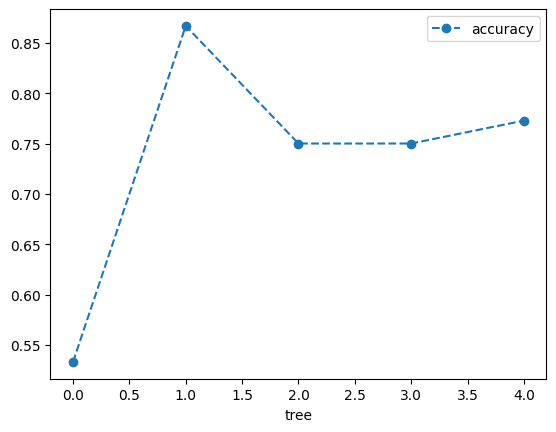

In [39]:
clf_dt = DecisionTreeClassifier(random_state = 42,ccp_alpha = 0.016)
## now use 5-fold cross validation create 5 different training and testing datsets that 
##are then used to train and test the tree
## we use 5_fold because we dont have tons of data 

scores = cross_val_score(clf_dt,X_train,y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5),'accuracy':scores})
df.plot(x = 'tree',y = 'accuracy',marker = 'o',linestyle='--')
plt.show()

The above graph shows that using different training and testing data with the same alpha 
resulted in different accuracies , sugeesting that the alpha is senstive to the datasets , so intestead 
of picking a single training dataset and single testing dataset , let's use cross validation
to find the optimal value for ccp_alpha.

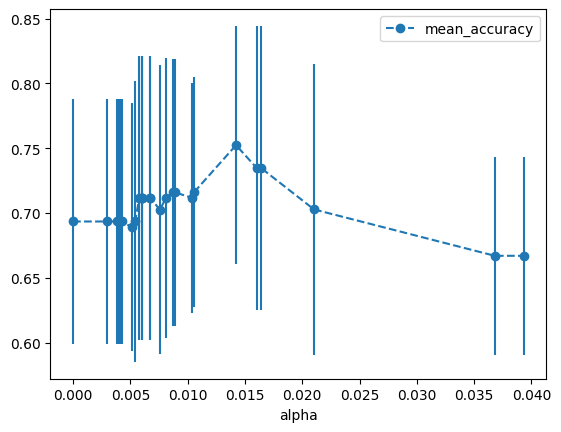

In [52]:
#create an array to store the results of each fold during cross-validation 
alpha_loops_vlaues = []

## for each candidate value for alpha,we will run 5-fold cross validation
##then we will store the mean and standard deviation of the scores(the accuracy)for each call
##to cross_val_score in alpha_loops_values...

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv = 5)
    alpha_loops_vlaues.append([ccp_alpha ,np.mean(scores),np.std(scores)])

##now we can draw a graph  of the means and standard deviation of the scores 
##for each candiate value alpha 
alpha_results = pd.DataFrame(alpha_loops_vlaues,
                             columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',
                 y = 'mean_accuracy',
                 yerr = 'std',
                 marker = 'o',
                 linestyle ='--')
plt.show()

using cross validation , we can see that oveall,insstead of ccp_alpha = 0.016 we need to set it something closer to 0.014
we can find exact value with:

In [56]:
alpha_results[(alpha_results['alpha']>0.014)
                 &
              (alpha_results['alpha']<0.015)]


20    0.014225
Name: alpha, dtype: float64

In [63]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014)
                 &
              (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [66]:
##convert ideal_ccp_alpha from series to float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

/var/folders/qr/mbvj8nwx4ndck31s7d51y49c0000gn/T/ipykernel_1463/263692681.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha = float(ideal_ccp_alpha)


0.014224751066856332

**Building ,Evaluating,Drawing and Interpreting the final Classifcation Tree**


In [67]:
## Build and train Decison Tree ,only this time use the optimal value for alpha 
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                    ccp_alpha =ideal_ccp_alpha )
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)

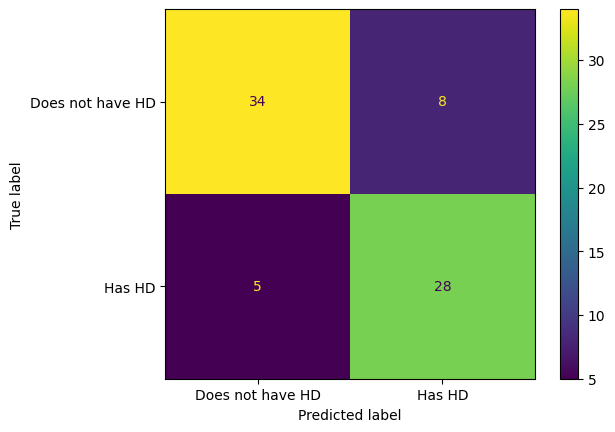

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    clf_dt_pruned,
    X_test,
    y_test,
    display_labels=["Does not have HD", "Has HD"]
)

We see that pruned tree is better classifying patients than the full sized tree

Of the **34 + 8 = 42** people that did not have heart disease, **34(81%)** we correctly classifed.
This is an improvement over the full sized tree ,which only correctly classfied **31(74%)** of the patient
without heart disease. Of the **5 + 28 = 33** people with heart disease, **28(85%)** were correctly
classfied . Again this is an improvement over the full sized tree,which only correctly classfied 
**26(79%)** of the patient with heart disease.




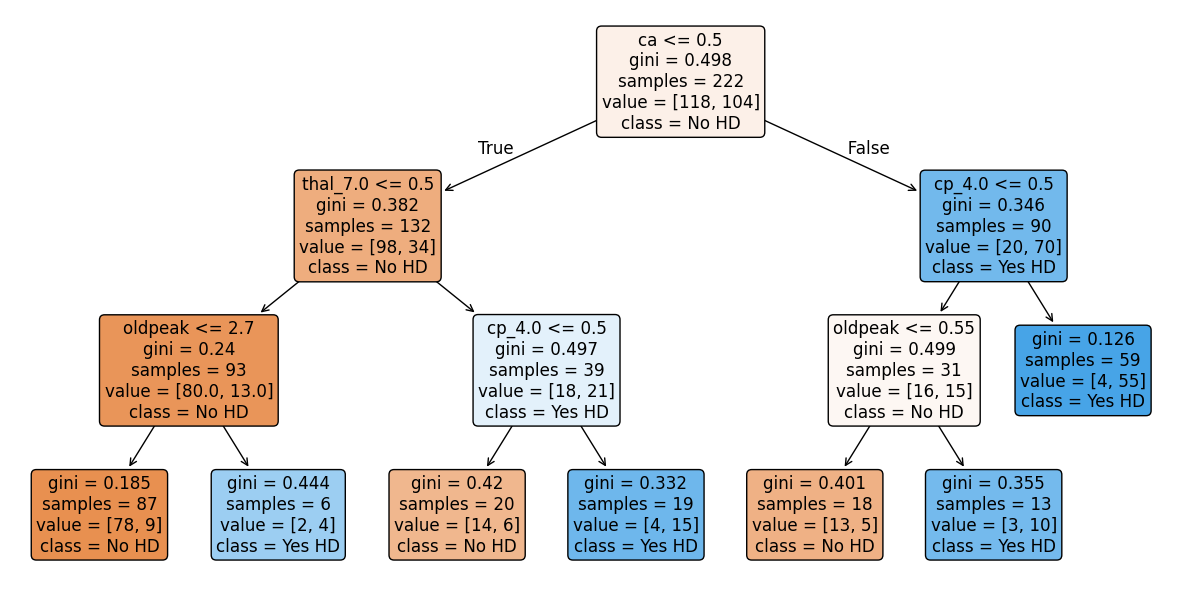

In [69]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled =True,
         rounded = True,
         class_names = ["No HD","Yes HD"],
         feature_names = X_encoded.columns);
